In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
train=pd.read_csv("Data/train.csv") # load the quora data


In [3]:
train.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [4]:
test.head(2)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?


# Data Cleaning Steps

In [5]:
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stops = set(stopwords.words('english'))

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

   

    return text

In [6]:
train['cleaned_question1']=train['question1'].apply(lambda x:text_clean(x))
train['cleaned_question2']=train['question2'].apply(lambda x:text_clean(x))


In [7]:
train

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh - i - noor d...,what would happen if the indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when math 23 ^ 24 math is d...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,astrology : i am a capricorn sun cap moon and ...,i am a triple capricorn sun moon and ascendant...
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,should i buy tiago,what keeps childern active and far from phone ...
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,how can i be a good geologist,what should i do to be a great geologist
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,when do you use instead of,when do you use instead of and
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,motorola company : can i hack my charter motor...,how do i hack motorola dcx3400 for free internet


In [10]:

len(train)

404290

In [11]:
train['len_q1']=train['cleaned_question1'].apply(lambda x:len(x.split()))


In [12]:
train['len_q2']=train['cleaned_question2'].apply(lambda x:len(x.split()))

In [13]:
import matplotlib.pyplot as plot
train['len_q1'].plot(kind="hist")

# max_len observed is 10


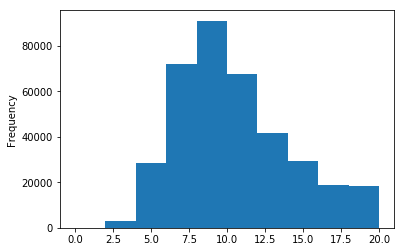

In [14]:
train['len_q2'].plot(kind="hist",range=(0,20));
# max len observed for answers is 50

# question lstm

In [15]:
train=train[(train['len_q1']<=10) & (train['len_q2']<=10)]
train=train[(train['len_q1']>=2) & (train['len_q2']>=2)]

In [16]:
len(train)   # hence we have around 11000 data having atleast 2 words and max 15 words in question

174937

# creating word embeddings for cleaned question

In [17]:
import numpy as np
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel("/Users/harika/Downloads/glove.6B/glove.6B.50d.txt")

Loading Glove Model
Done. 400000  words loaded!


In [18]:
model['dress']

array([-0.77318 ,  0.34386 , -1.9414  , -0.77677 ,  0.79316 ,  0.20095 ,
       -0.15134 , -0.81112 , -0.62296 , -0.86132 ,  0.084821, -0.2078  ,
        0.29567 ,  0.3246  ,  0.27001 ,  0.43369 , -0.98171 , -0.43157 ,
        0.54172 , -1.5346  , -0.030456,  0.58648 , -0.095475,  0.045125,
       -0.8933  , -1.0634  , -1.5099  ,  1.0308  ,  0.3999  , -1.1184  ,
        1.8495  ,  0.91909 , -0.51057 ,  0.34021 ,  0.23894 ,  0.47147 ,
        0.077344,  0.46934 , -1.1299  , -0.32454 ,  0.20254 ,  0.48451 ,
        0.46428 , -0.090925,  0.44787 , -0.98459 ,  0.45304 , -1.2673  ,
       -0.30428 ,  0.26306 ])

In [19]:
np.random.seed(0)
unk = list(np.random.uniform(low=-1.0, high=1.0, size=(50,)))
pad= list(np.zeros(50,dtype=float))

In [20]:
max_len_q1=12

## adding pads if length is less than max review length and cutting if the length is more

In [21]:
from nltk.tokenize import word_tokenize

def sentence_embeddings(reviews):
    words=word_tokenize(reviews)
    words=[word.lower() for word in words]
    vec_sen=[list(model[word]) if word in model else unk for word in words]
    if len(vec_sen)<max_len_q1:
        num_pads=max_len_q1-len(vec_sen)
        added_pads=[pad]*num_pads
        added_pads.extend(vec_sen) 
        vec_sen = added_pads
    else:
        vec_sen=vec_sen[0:max_len_q1]
         
        
    return (vec_sen) 

In [22]:
train['que1_word_embeddings']=train['cleaned_question1'].apply(lambda x:sentence_embeddings(x))
train['que2_word_embeddings']=train['cleaned_question2'].apply(lambda x:sentence_embeddings(x))



In [24]:
train['que1_word_embeddings'].iloc[1][::-1]

[[0.70853,
  0.57088,
  -0.4716,
  0.18048,
  0.54449,
  0.72603,
  0.18157,
  -0.52393,
  0.10381,
  -0.17566,
  0.078852,
  -0.36216,
  -0.11829,
  -0.83336,
  0.11917,
  -0.16605,
  0.061555,
  -0.012719,
  -0.56623,
  0.013616,
  0.22851,
  -0.14396,
  -0.067549,
  -0.38157,
  -0.23698,
  -1.7037,
  -0.86692,
  -0.26704,
  -0.2589,
  0.1767,
  3.8676,
  -0.1613,
  -0.13273,
  -0.68881,
  0.18444,
  0.0052464,
  -0.33874,
  -0.078956,
  0.24185,
  0.36576,
  -0.34727,
  0.28483,
  0.075693,
  -0.062178,
  -0.38988,
  0.22902,
  -0.21617,
  -0.22562,
  -0.093918,
  -0.80375],
 [0.16834,
  -0.072452,
  0.081124,
  -0.51142,
  0.36302,
  0.26761,
  -0.33017,
  -0.12967,
  -0.43045,
  0.036193,
  -0.11362,
  0.34919,
  -0.11913,
  0.07478,
  0.22611,
  0.22578,
  -0.033976,
  -0.0019064,
  -0.037438,
  -0.89569,
  0.43247,
  -0.14601,
  0.40009,
  -0.011041,
  0.10408,
  -1.5355,
  0.20654,
  0.14319,
  0.59204,
  -0.5744,
  3.2859,
  0.3822,
  -0.64248,
  -0.24752,
  0.031905,
  0.1596

In [25]:
train['que1_word_embeddings'].shape

(174937,)

In [26]:
que1_word_embeddings=list(train['que1_word_embeddings'])

In [27]:
len(que1_word_embeddings)

174937

In [28]:
len(que1_word_embeddings[0]) # maximum question length is 12 if not 12 then padded with 0

12

In [29]:
len(que1_word_embeddings[0][0]) # 50 dimensions for each word as per glove 50 dimension file

50

In [30]:
questions_cols = ['question1', 'question2','cleaned_question1','cleaned_question2','que1_word_embeddings','que2_word_embeddings']

In [31]:
train

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,len_q1,len_q2,que1_word_embeddings,que2_word_embeddings
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,how can i be a good geologist,what should i do to be a great geologist,7,9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,when do you use instead of,when do you use instead of and,6,7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,motorola company : can i hack my charter motor...,how do i hack motorola dcx3400 for free internet,10,9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1,how do i read and find my youtube comments,how can i see all my youtube comments,9,8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1,what can make physics easy to learn,how can you make physics easy to learn,7,8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1,what was your first sexual experience like,what was your first sexual experience,7,6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
16,16,33,34,What does manipulation mean?,What does manipulation means?,1,what does manipulation mean,what does manipulation means,4,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
19,19,39,40,Which is the best digital marketing institutio...,Which is the best digital marketing institute ...,0,which is the best digital marketing institutio...,which is the best digital marketing institute ...,9,9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
20,20,41,42,Why do rockets look white?,Why are rockets and boosters painted white?,1,why do rockets look white,why are rockets and boosters painted white,5,7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
21,21,43,44,What's causing someone to be jealous?,What can I do to avoid being jealous of someone?,0,what is causing someone to be jealous,what can i do to avoid being jealous of someone,7,10,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Training Section

In [32]:

from sklearn.model_selection import train_test_split
validation_size = 40000   # validation samples size
training_size = len(train) - validation_size

X = train[questions_cols]
Y = train['is_duplicate']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)   # spiliting the validation set from training set

In [33]:
train.shape
X_train.shape 
X_validation.shape

(174937, 12)

(134937, 6)

(40000, 6)

# Batch Function 

In [129]:
import numpy as np
def batch(x1,x2,y,batch_size):
#     print type(x[0])
    num_of_batches=len(x1)//batch_size
    for i in range(0,len(x1),batch_size):
        yield list(x1[i:i+batch_size]),list(x2[i:i+batch_size]), y[i:i+batch_size]
                                                              
                                                              
                                                              

# Tensor Flow Implementation

In [130]:
# parameter declartaion
tf.reset_default_graph()    # clear the graph before we start using
input_data1=tf.placeholder(tf.float32,[None,None,50],name="input1") 
input_data2=tf.placeholder(tf.float32,[None,None,50],name="input2") 

# input should be the shape of wordembeddings
label=tf.placeholder(tf.float32,[None],name="label")


In [131]:
num_of_units=100    # output of lstm 
num_layers=1        # currently single layer



# Using Tanh Activation Function And Manhattan Distance 

In [132]:

with tf.variable_scope('one'):
    lstm = tf.nn.rnn_cell.LSTMCell(num_of_units)   # pass the number of lstm units 
    output1,state = tf.nn.dynamic_rnn(lstm,input_data1,dtype=tf.float32)   # output of each cell and previous state will be returned
    output1_ = output1[:,-1]
with tf.variable_scope('two'):
    lstm2 = tf.nn.rnn_cell.LSTMCell(num_of_units)
    output2,state = tf.nn.dynamic_rnn(lstm2,input_data2,dtype=tf.float32)   # output of each cell and previous state will be returned
    output2_ = output2[:,-1]

hid1 = tf.contrib.layers.fully_connected(output1_, num_outputs = 50, activation_fn=tf.tanh)
hid2= tf.contrib.layers.fully_connected(output2_, num_outputs = 50, activation_fn=tf.tanh)

# manhattan distance

predictions =  tf.math.exp(-tf.reduce_sum(tf.abs(tf.subtract(hid1, hid2)),axis=1))
#predictions =  tf.math.exp(-tf.reduce_sum(tf.abs(tf.subtract(output1_, output2_)),axis=1))  # check for results without adding extra layers
loss = tf.losses.mean_squared_error(label, predictions)
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)
correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.float32), label)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    

   
    

In [133]:
training2_accuracy = []
validation2_accuracy= []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    for m in range(50):
        print("epoch:",m,end=" ") 
        epoch_accuracy = 0.0
        batch_counter = 0
        for x1,x2,y in batch(X_train.iloc[:]['que1_word_embeddings'],X_train.iloc[:]['que2_word_embeddings'],Y_train.iloc[:],200):
            tens_res = sess.run([predictions,label,loss,optimizer,correct_pred,accuracy],feed_dict={input_data1:x1,input_data2:x2,label:y})
            epoch_accuracy += (tens_res[-1])
            batch_counter += 1
        accu_ = float(epoch_accuracy)/float(batch_counter)
        print("epoch_accuracy :: ",accu_)
        training2_accuracy.append(accu_)
        
        
        
        for x1,x2,y in batch(X_validation.iloc[:]['que1_word_embeddings'],X_validation.iloc[:]['que2_word_embeddings'],Y_validation.iloc[:],40000):
            tens_res = sess.run([accuracy],feed_dict={input_data1:x1,input_data2:x2,label:y})
            valid_acc=tens_res[-1]
            print("validation_accuracy",tens_res[-1])
            validation2_accuracy.append(valid_acc)
        
        
        
     

epoch: 0 epoch_accuracy ::  0.6275948632204974
validation_accuracy 0.67835
epoch: 1 epoch_accuracy ::  0.6873964853639956
validation_accuracy 0.69065
epoch: 2 epoch_accuracy ::  0.7000415237744649
validation_accuracy 0.69515
epoch: 3 epoch_accuracy ::  0.7086329287952847
validation_accuracy 0.7005
epoch: 4 epoch_accuracy ::  0.7160032991126731
validation_accuracy 0.70495
epoch: 5 epoch_accuracy ::  0.7230067038536072
validation_accuracy 0.708325
epoch: 6 epoch_accuracy ::  0.7285468498865764
validation_accuracy 0.713375
epoch: 7 epoch_accuracy ::  0.7342829955065692
validation_accuracy 0.717975
epoch: 8 epoch_accuracy ::  0.7402533657462509
validation_accuracy 0.722275
epoch: 9 epoch_accuracy ::  0.7447644772352996
validation_accuracy 0.724225
epoch: 10 epoch_accuracy ::  0.7498789947121232
validation_accuracy 0.7268
epoch: 11 epoch_accuracy ::  0.7539969162587766
validation_accuracy 0.73025
epoch: 12 epoch_accuracy ::  0.7584932134769581
validation_accuracy 0.7313
epoch: 13 epoch_accu

Text(0.5,0,'epoch')

Text(0,0.5,'accuracy')

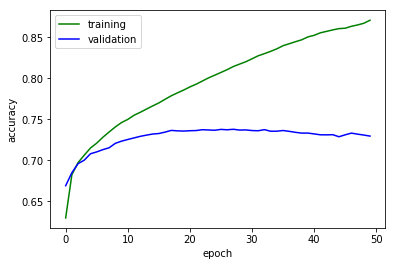

In [176]:
import matplotlib.pyplot as plt  
import matplotlib.image as Image
plt.plot(training2_accuracy, color='g',label='training')
plt.plot(validation2_accuracy, color='b',label='validation')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('accuracy_plot_additional_layer_tanh.png')   # lstm units:100 # activation:tanh # extra layers :1 for question1 ,1 for question2
                                                        # loss :mse # optimizer:adam
    
                                                        # epoch 35  epoch: 35 epoch_accuracy ::  0.8397437160103409
                                                    
#validation_accuracy 0.73625

In [4]:
# Try Without Activation Function and No extra layers

Text(0.5,0,'epoch')

Text(0,0.5,'accuracy')

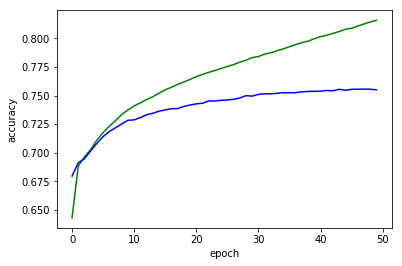

In [167]:
import matplotlib.pyplot as plt  
import matplotlib.image as Image
plt.plot(training2_accuracy, color='g')
plt.plot(validation2_accuracy, color='b')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig('accuracy_plot_no_additional_layer_sigmoid.png')   # lstm units :100 
                                                                #loss   : mean square error 
                                                                #optimizer : adam
                                                            # activation :NONE & no extra layers        

In [ ]:
# try using sigmoid activation function 

In [ ]:

# with tf.variable_scope('one'):
#     lstm = tf.nn.rnn_cell.LSTMCell(num_of_units)   # pass the number of lstm units 
#     output1,state = tf.nn.dynamic_rnn(lstm,input_data1,dtype=tf.float32)   # output of each cell and previous state will be returned
#     output1_ = output1[:,-1]
# with tf.variable_scope('two'):
#     lstm2 = tf.nn.rnn_cell.LSTMCell(num_of_units)
#     output2,state = tf.nn.dynamic_rnn(lstm2,input_data2,dtype=tf.float32)   # output of each cell and previous state will be returned
#     output2_ = output2[:,-1]

# hid1 = tf.contrib.layers.fully_connected(output1_, num_outputs = 90, activation_fn=tf.sigmoid)
# hid2= tf.contrib.layers.fully_connected(output2_, num_outputs = 90, activation_fn=tf.sigmoid)
# predictions =  tf.math.exp(-tf.reduce_sum(tf.abs(tf.subtract(hid1, hid2)),axis=1))
# loss = tf.losses.mean_squared_error(label, predictions)
# optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)
# correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.float32), label)
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
# training2_accuracy = []
# validation2_accuracy= []
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     sess.run(tf.local_variables_initializer())
#     for m in range(50):
#         print("epoch:",m,end=" ") 
#         epoch_accuracy = 0.0
#         batch_counter = 0
#         for x1,x2,y in batch(X_train.iloc[:]['que1_word_embeddings'],X_train.iloc[:]['que2_word_embeddings'],Y_train.iloc[:],200):
#             tens_res = sess.run([predictions,label,loss,optimizer,correct_pred,accuracy],feed_dict={input_data1:x1,input_data2:x2,label:y})
#             epoch_accuracy += (tens_res[-1])
#             batch_counter += 1
#         accu_ = float(epoch_accuracy)/float(batch_counter)
#         print("epoch_accuracy :: ",accu_)
#         training2_accuracy.append(accu_)
        
        
        
#         for x1,x2,y in batch(X_validation.iloc[:]['que1_word_embeddings'],X_validation.iloc[:]['que2_word_embeddings'],Y_validation.iloc[:],40000):
#             tens_res = sess.run([accuracy],feed_dict={input_data1:x1,input_data2:x2,label:y})
#             valid_acc=tens_res[-1]
#             print("validation_accuracy",tens_res[-1])
#             validation2_accuracy.append(valid_acc)
        
        
        

Text(0.5,0,'epoch')

Text(0,0.5,'accuracy')

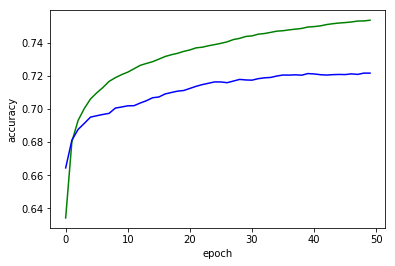

In [146]:
import matplotlib.pyplot as plt  
import matplotlib.image as Image
plt.plot(training2_accuracy, color='g')
plt.plot(validation2_accuracy, color='b')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig('accuracy_plot_sigmoid.png')
